In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 
from sklearn.model_selection import train_test_split


from sklearn.utils import shuffle


from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,precision_score,recall_score


import matplotlib.pyplot as plt




In [24]:
df = pd.read_csv('dataset.csv')
df = shuffle(df, random_state = 42)
df.head()

for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')
    
df.head()

## charactieristics of data

df.describe()

null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


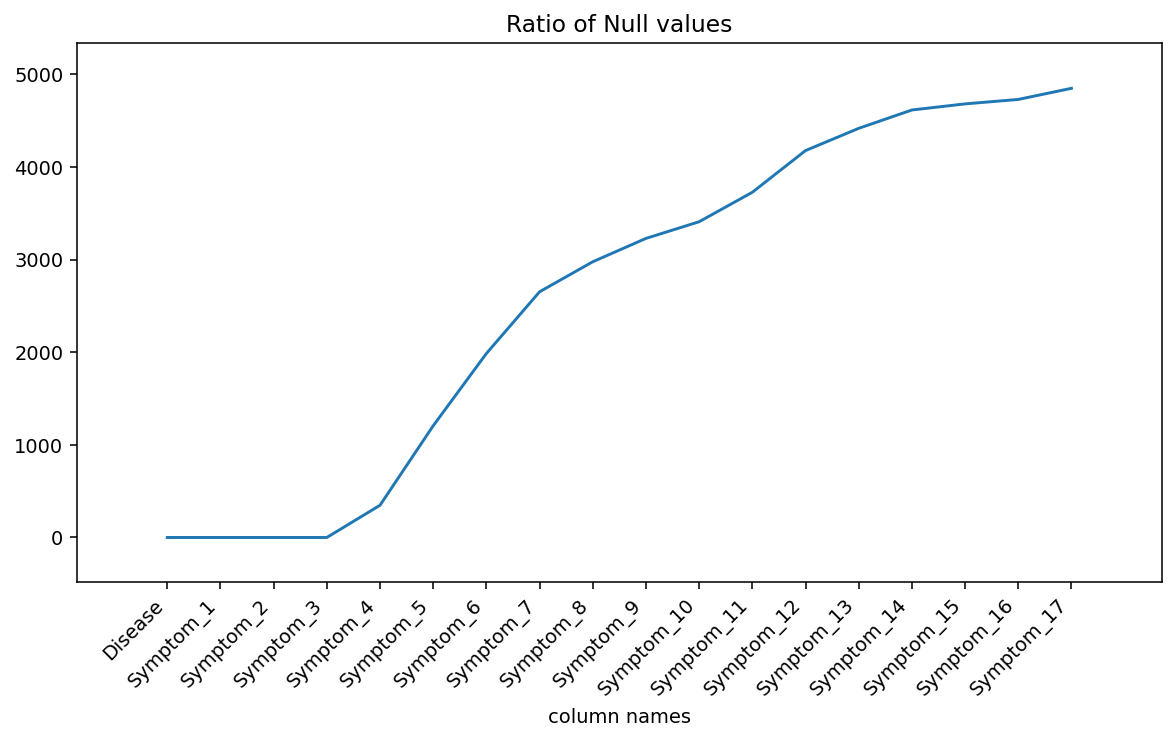

In [25]:
plt.figure(figsize=(10, 5), dpi=140)
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
plt.title('Ratio of Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [26]:
cols = df.columns

data = df[cols].values.flatten()

reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)

df = pd.DataFrame(reshaped, columns = df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [28]:
df_severity = pd.read_csv('Symptom-severity.csv')
df_severity['Symptom'] = df_severity['Symptom'].str.replace('_',' ')
df_severity.head(10)

## overall list

df_severity['Symptom'].unique()

vals = df.values
symptoms = df_severity['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_severity[df_severity['Symptom'] == symptoms[i]]['weight'].values[0]

In [29]:
df_processed = pd.DataFrame(vals, columns=cols)
df_processed.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0


In [30]:
df_processed = df_processed.replace('dischromic  patches', 0)
df_processed = df_processed.replace('spotting  urination', 0)
df_processed = df_processed.replace('foul smell of urine', 0)

C:\Users\nairs\AppData\Local\Temp\ipykernel_16500\3191384345.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_processed = df_processed.replace('dischromic  patches', 0)
C:\Users\nairs\AppData\Local\Temp\ipykernel_16500\3191384345.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_processed = df_processed.replace('spotting  urination', 0)
C:\Users\nairs\AppData\Local\Temp\ipykernel_16500\3191384345.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the o

In [31]:
data = df_processed.iloc[:,1:].values
labels = df['Disease'].values

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

print(X_train[0])
print(X_train[1])

(3936, 17) (3936,) (984, 17) (984,)
[6 4 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 5 3 5 4 4 3 2 3 0 0 0 0 0 0 0 0]


In [32]:
def performance_evaluator(model, X_test, y_test):
    """
    model: Load the trained model
    X_test: test data
    y_test: Actual value
    
    """
    
    y_predicted = model.predict(X_test)
    
    precision = precision_score(y_test, y_predicted,average='micro')*100
    
    accuracy = accuracy_score(y_test, y_predicted)*100
    
    f1 = f1_score(y_test, y_predicted, average='macro')*100

    recall = recall_score(y_test, y_predicted, average='macro')*100
    
    print('precision----->', precision) 
    print('\n************************')
    print('Accuracy----->', accuracy)
    print('\n************************')
    print('F1 Score----->', f1)
    print('\n************************')
    print('Recall----->', recall)
    print('\n************************')
    return accuracy, precision, f1, recall

In [33]:
def confusion_plot(model, X_test, y_test):
    """
    to plot confusion metrix
    """
    plt.figure(figsize=(10, 10), dpi=150)
    
    y_pred = model.predict(X_test)
    con_me = confusion_matrix(y_test, y_pred)
    sns.heatmap(con_me, annot=True)

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

def hybrid_predict(X_input):
    """
    Hybrid model that first predicts using Naive Bayes, then refines using Random Forest.
    """
    # Step 1: Get probabilities from Naive Bayes
    nb_probs = nb_model.predict_proba(X_input)
    
    # Step 2: Get top probable diseases from Naive Bayes
    top_indices = np.argsort(-nb_probs, axis=1)[:, :3]  # Top 3 diseases
    top_diseases = np.array(nb_model.classes_)[top_indices]
    
    # Step 3: Use Random Forest for refinement on the top predicted class
    rf_predictions = rf_model.predict(X_input)

    final_predictions = []
    for i in range(len(X_input)):
        main_disease = rf_predictions[i]  # Final refined prediction
        alternative_diseases = top_diseases[i][top_diseases[i] != main_disease][:2]  # Exclude main disease
        
        final_predictions.append((main_disease, list(alternative_diseases)))

    return final_predictions

# Example usage
test_sample = X_test[:5]  # Take some test samples
results = hybrid_predict(test_sample)

# Print results
for i, (main, alternatives) in enumerate(results):
    print(f"Test Sample {i+1}:")
    print(f"   Most Probable Disease: {main}")
    print(f"   Possible Alternatives: {alternatives}")
    print("-" * 40)


Test Sample 1:
   Most Probable Disease: Migraine
   Possible Alternatives: ['hepatitis A', 'Typhoid']
----------------------------------------
Test Sample 2:
   Most Probable Disease: Peptic ulcer diseae
   Possible Alternatives: ['Hypertension', 'Cervical spondylosis']
----------------------------------------
Test Sample 3:
   Most Probable Disease: Fungal infection
   Possible Alternatives: ['Paralysis (brain hemorrhage)', 'Urinary tract infection']
----------------------------------------
Test Sample 4:
   Most Probable Disease: Hypoglycemia
   Possible Alternatives: ['Pneumonia', 'Hepatitis E']
----------------------------------------
Test Sample 5:
   Most Probable Disease: Hepatitis B
   Possible Alternatives: ['Hepatitis E', 'Hypertension']
----------------------------------------


In [35]:
def evaluate_hybrid_model(X_test, y_test):
    """
    Evaluates the hybrid model using accuracy, precision, recall, and F1-score.
    """
    # Get predictions from the hybrid model
    hybrid_preds = [main for main, _ in hybrid_predict(X_test)]  # Extract only main disease

    # Calculate metrics
    precision = precision_score(y_test, hybrid_preds, average='micro') * 100
    accuracy = accuracy_score(y_test, hybrid_preds) * 100
    f1 = f1_score(y_test, hybrid_preds, average='macro') * 100
    recall = recall_score(y_test, hybrid_preds, average='macro') * 100

    # Print results
    print('Precision:', precision)
    print('Accuracy:', accuracy)
    print('F1 Score:', f1)
    print('Recall:', recall)

    return accuracy, precision, f1, recall

# Evaluate model
evaluate_hybrid_model(X_test, y_test)


Precision: 99.59349593495935
Accuracy: 99.59349593495935
F1 Score: 99.58380389536958
Recall: 99.58147049710061


(99.59349593495935, 99.59349593495935, 99.58380389536958, 99.58147049710061)

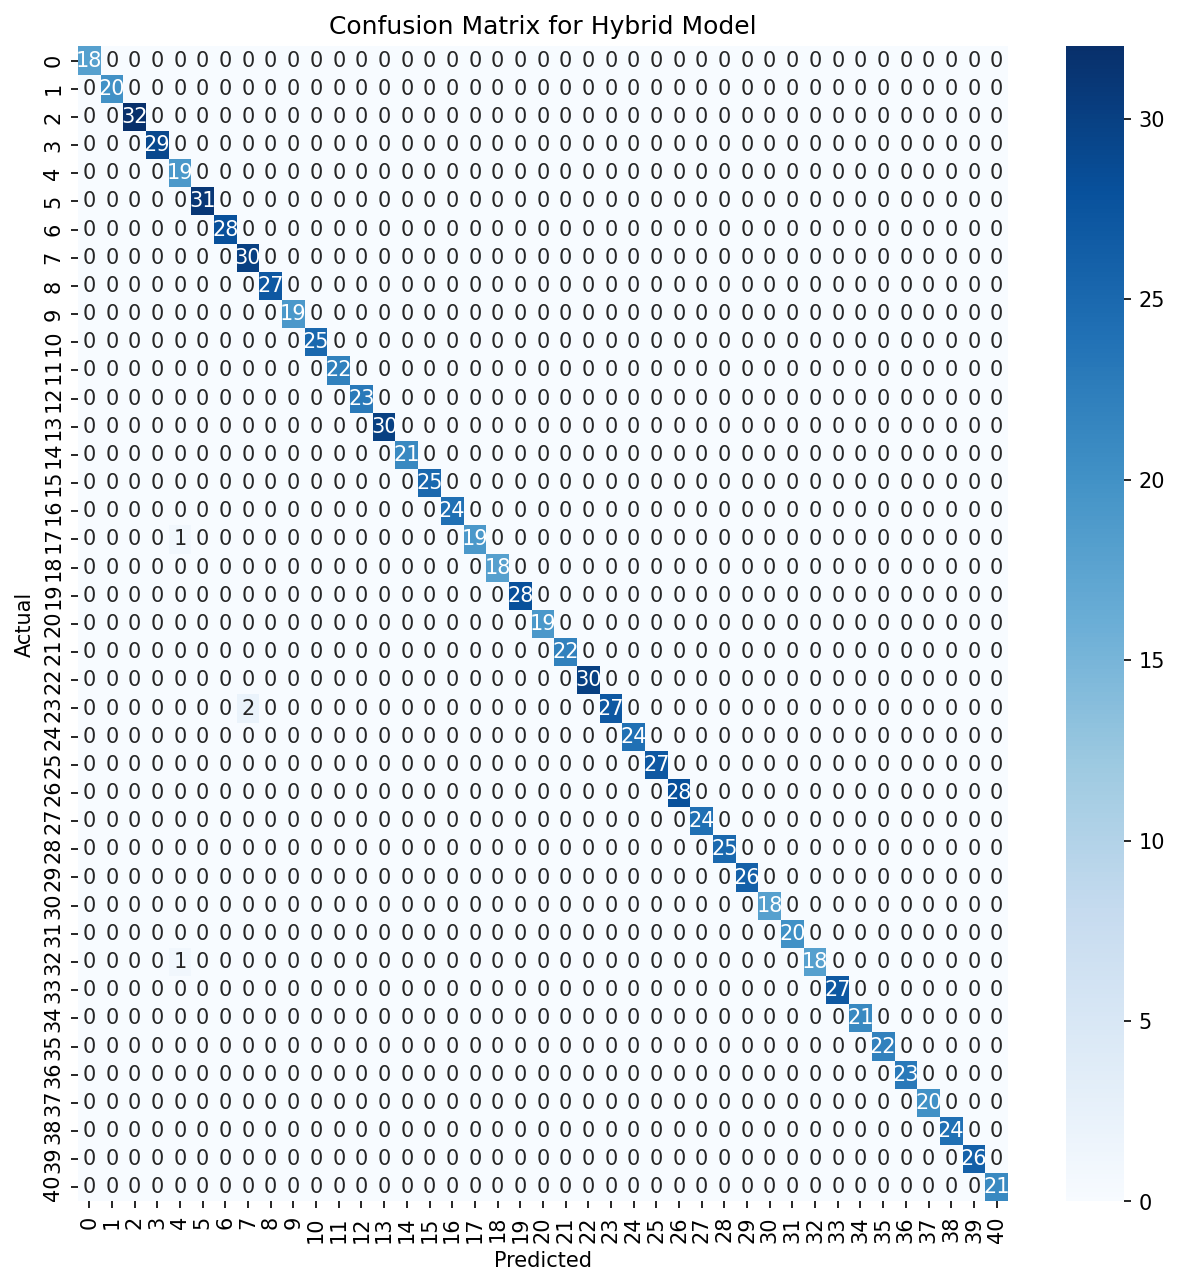

In [36]:
def confusion_plot(model, X_test, y_test):
    """
    Plots the confusion matrix.
    """
    plt.figure(figsize=(10, 10), dpi=150)
    
    y_pred = [main for main, _ in hybrid_predict(X_test)]  # Get only main predictions
    con_me = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(con_me, annot=True, fmt='d', cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix for Hybrid Model")
    plt.show()

# Plot confusion matrix
confusion_plot(hybrid_predict, X_test, y_test)


In [37]:
# Train Naïve Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluate Naïve Bayes Alone
print("Naïve Bayes Model Performance:")
performance_evaluator(nb_model, X_test, y_test)


Naïve Bayes Model Performance:
precision-----> 87.70325203252033

************************
Accuracy-----> 87.70325203252033

************************
F1 Score-----> 86.58357842139314

************************
Recall-----> 87.43870293145767

************************


(87.70325203252033, 87.70325203252033, 86.58357842139314, 87.43870293145767)

Confusion Matrix for Naïve Bayes:


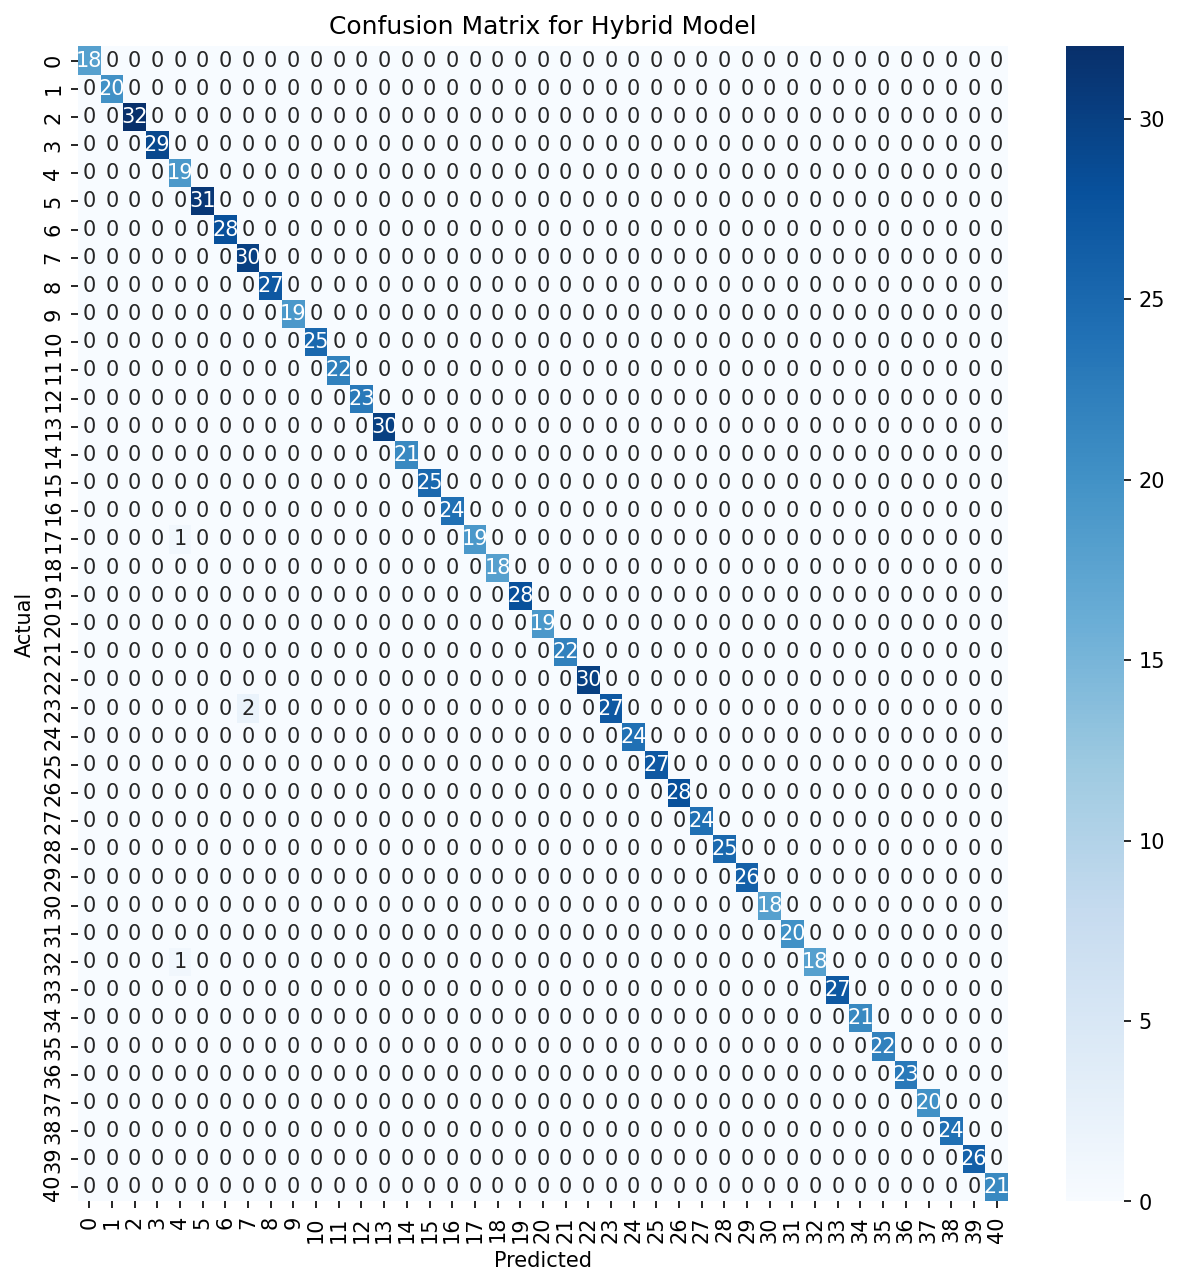

In [38]:
# Plot confusion matrix for Naïve Bayes
print("Confusion Matrix for Naïve Bayes:")
confusion_plot(nb_model, X_test, y_test)


In [39]:
import joblib

# Save Naive Bayes Model
joblib.dump(nb_model, "naive_bayes_model.pkl")

# Save Random Forest Model
joblib.dump(rf_model, "random_forest_model.pkl")

print("Models saved successfully!")


Models saved successfully!


In [40]:
import joblib

# Load the saved models
nb_model = joblib.load("naive_bayes_model.pkl")
rf_model = joblib.load("random_forest_model.pkl")

print("Models loaded successfully!")

# Now, you can use hybrid_predict() without retraining
test_sample = X_test[:5]  # Take some test samples
results = hybrid_predict(test_sample)

# Print results
for i, (main, alternatives) in enumerate(results):
    print(f"Test Sample {i+1}:")
    print(f"   Most Probable Disease: {main}")
    print(f"   Possible Alternatives: {alternatives}")
    print("-" * 40)


Models loaded successfully!
Test Sample 1:
   Most Probable Disease: Migraine
   Possible Alternatives: ['hepatitis A', 'Typhoid']
----------------------------------------
Test Sample 2:
   Most Probable Disease: Peptic ulcer diseae
   Possible Alternatives: ['Hypertension', 'Cervical spondylosis']
----------------------------------------
Test Sample 3:
   Most Probable Disease: Fungal infection
   Possible Alternatives: ['Paralysis (brain hemorrhage)', 'Urinary tract infection']
----------------------------------------
Test Sample 4:
   Most Probable Disease: Hypoglycemia
   Possible Alternatives: ['Pneumonia', 'Hepatitis E']
----------------------------------------
Test Sample 5:
   Most Probable Disease: Hepatitis B
   Possible Alternatives: ['Hepatitis E', 'Hypertension']
----------------------------------------


In [41]:
joblib.dump(X_test, "X_test.pkl")


['X_test.pkl']

In [42]:
X_test = joblib.load("X_test.pkl")
print(X_test.shape)  # To confirm it's loaded properly


(984, 17)
